In [1]:
import math
import numpy as np

In [36]:
def adamsBasforth_for_predictor(dy, x: np.ndarray, y: np.ndarray, h):
    i = len(x) - 1
    return y[i] + h / 24 * (55 * dy(x[i], y[i]) - 59 * dy(x[i - 1], y[i - 2]) 
                            + 37 * dy(x[i - 3], y[i - 3]) - 9 * dy(x[i - 4], y[i - 4]))

def adamsMoultons_for_corrector(dy, x: np.ndarray, y: np.ndarray, h, numberForCorrection):
    i = len(x) - 1
    for _ in range(numberForCorrection):
        y[i] =  y[i - 1] + h / 24 * (9 * dy(x[i], y[i]) + 19 * dy(x[i - 1], y[i - 1]) 
                                     - 5 * dy(x[i - 2], y[i - 2]) + dy(x[i - 3], y[i - 3]))
    return y

def RK4(dy, x_0, y_0, h):
    K1 = dy(x_0, y_0)
    K2 = dy(x_0 + h / 2, y_0 + K1 * h / 2)
    K3 = dy(x_0 + h / 2, y_0 + K2 * h / 2)
    K4 = dy(x_0 + h, y_0 + K3 * h)
    y_0 = y_0 + h / 6 * (K1 + 2 * K2 + 2 * K3 + K4)
    x_0 = x_0 + h
    return x_0, y_0
    

def adamForthOrder(dy, x_start: float, x_end: float, y_start: float, h, numberForCorrection):
    numOfPoint = int((x_end - x_start) / h)
    x = np.array([x_start])
    y = np.array([y_start])
    for i in range(3):
        new_x, new_y = RK4(dy, x[i], y[i], h)
        x = np.append(x, new_x)
        y = np.append(y, new_y)
    
    numOfPoint -= 3
    for i in range(numOfPoint):
        new_y = adamsBasforth_for_predictor(dy, x, y, h)
        new_x = x[len(x) - 1] + h
        y = np.append(y, new_y)
        x = np.append(x, new_x)
        adamsMoultons_for_corrector(dy, x, y, h, numberForCorrection)
    
    return x, y



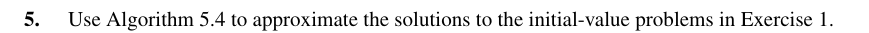

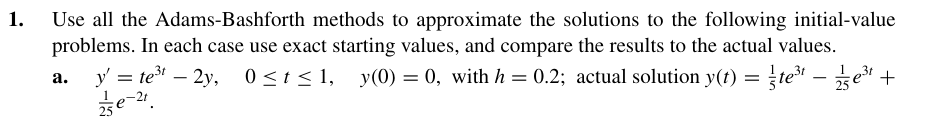

In [40]:
# Hieu chinh 100 lan
dy = lambda x, y: x * math.exp(3 * x) - 2 * y
y = lambda x: 1/5 * x * np.exp(3 * x) - 1 / 25 * np.exp(3 * x) + 1 / 25 * np.exp(-2 * x)
res_x, res_y = adamForthOrder(dy, x_start=0, x_end=1, y_start=0, h=0.2, numberForCorrection=100)
print(y(0))
truth_y = y(res_x)
for i in range(len(res_y)):
    print(f"Approximate y({round(res_x[i], 4)}) = {res_y[i]} - actual value = {truth_y[i]}")

0.0
Approximate y(0.0) = 0.0 - actual value = 0.0
Approximate y(0.2) = 0.026905914965434364 - actual value = 0.026812801841425586
Approximate y(0.4) = 0.1510468456316578 - actual value = 0.15077783547415086
Approximate y(0.6) = 0.4966478589341641 - actual value = 0.49601956562952404
Approximate y(0.8) = 1.3350639275979663 - actual value = 1.3308570263967792
Approximate y(1.0) = 3.2292814828362952 - actual value = 3.2190993190394916


In [41]:
# Hieu chinh 100 lan
dy = lambda x, y: 1 + (x - y)**2
y = lambda x: x + 1 / (1 - x)
res_x, res_y = adamForthOrder(dy, x_start=2, x_end=3, y_start=1, h=0.2, numberForCorrection=100)
print(y(0))
truth_y = y(res_x)
for i in range(len(res_y)):
    print(f"Approximate y({round(res_x[i], 4)}) = {res_y[i]} - actual value = {truth_y[i]}")

1.0
Approximate y(2.0) = 1.0 - actual value = 1.0
Approximate y(2.2) = 1.3666609643769614 - actual value = 1.366666666666667
Approximate y(2.4) = 1.685707869536457 - actual value = 1.6857142857142864
Approximate y(2.6) = 1.974994106391466 - actual value = 1.9750000000000008
Approximate y(2.8) = 2.2445147516740858 - actual value = 2.2444444444444454
Approximate y(3.0) = 2.500089418963671 - actual value = 2.500000000000001


In [43]:
# Hieu chinh 100 lan
dy = lambda x, y: 1 + y / x
y = lambda x: x * np.log(x) + 2 * x
res_x, res_y = adamForthOrder(dy, x_start=1, x_end=2, y_start=2, h=0.2, numberForCorrection=100)
truth_y = y(res_x)
for i in range(len(res_y)):
    print(f"Approximate y({round(res_x[i], 4)}) = {res_y[i]} - actual value = {truth_y[i]}")

Approximate y(1.0) = 2.0 - actual value = 2.0
Approximate y(1.2) = 2.6187786960514234 - actual value = 2.6187858681527456
Approximate y(1.4) = 3.2710490817134175 - actual value = 3.2710611312696978
Approximate y(1.6) = 3.951989955820625 - actual value = 3.9520058067931765
Approximate y(1.8) = 4.657988459607925 - actual value = 4.6580159968238135
Approximate y(2.0) = 5.386257715440129 - actual value = 5.38629436111989


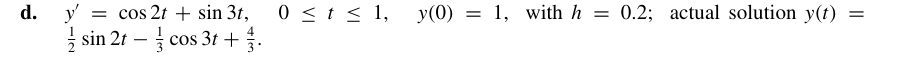

In [44]:
# Hieu chinh 100 lan
dy = lambda x, y: np.cos(2 * x) + np.sin(3 * x)
y = lambda x: 1 / 2 * np.sin(2 * x) - 1 / 3 * np.cos(3 * x) + 4 / 3
res_x, res_y = adamForthOrder(dy, x_start=0, x_end=1, y_start=1, h=0.2, numberForCorrection=100)
truth_y = y(res_x)
for i in range(len(res_y)):
    print(f"Approximate y({round(res_x[i], 4)}) = {res_y[i]} - actual value = {truth_y[i]}")

Approximate y(0.0) = 1.0 - actual value = 1.0
Approximate y(0.2) = 1.252935020180275 - actual value = 1.2529306328510992
Approximate y(0.4) = 1.5712383322089736 - actual value = 1.5712254606242035
Approximate y(0.6) = 1.8751096772275748 - actual value = 1.8750869078813088
Approximate y(0.8) = 2.079661758367718 - actual value = 2.078918040034501
Approximate y(1.0) = 2.119257482691901 - actual value = 2.1179795456129895
